In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, classification_report, confusion_matrix
from sklearn.naive_bayes import GaussianNB, MultinomialNB, ComplementNB, BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import TensorBoard
import datetime

from sklearn.datasets import load_wine

np.random.seed(42)
tf.random.set_seed(42)

import warnings
warnings.filterwarnings('ignore')

print("Все библиотеки успешно импортированы!")

Все библиотеки успешно импортированы!


In [ ]:
wine_data = load_wine()
print("Описание датасета:")
print(wine_data.DESCR)

X = pd.DataFrame(wine_data.data, columns=wine_data.feature_names)
y = pd.Series(wine_data.target, name='target')

print(f"\nРазмер датасета: {X.shape}")
print(f"Количество классов: {len(np.unique(y))}")
print(f"Названия классов: {wine_data.target_names}")
print(f"Названия признаков: {wine_data.feature_names}")

print("\nПервые 5 строк датасета:")
X.head()

Описание датасета:
.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

:Number of Instances: 178
:Number of Attributes: 13 numeric, predictive attributes and the class
:Attribute Information:
    - Alcohol
    - Malic acid
    - Ash
    - Alcalinity of ash
    - Magnesium
    - Total phenols
    - Flavanoids
    - Nonflavanoid phenols
    - Proanthocyanins
    - Color intensity
    - Hue
    - OD280/OD315 of diluted wines
    - Proline
    - class:
        - class_0
        - class_1
        - class_2

:Summary Statistics:

============================= ==== ===== ======= =====
                                Min   Max   Mean     SD
============================= ==== ===== ======= =====
Alcohol:                      11.0  14.8    13.0   0.8
Malic Acid:                   0.74  5.80    2.34  1.12
Ash:                          1.36  3.23    2.36  0.27
Alcalinity of Ash:            10.6  30.0    19.5   3.3
Magnesium:                    70.0 

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


# Описание набора данных "Wine recognition dataset"

## Общая информация

- **Количество наблюдений:** 178
- **Количество признаков:** 13 числовых атрибутов + целевая переменная (класс)
- **Количество классов:** 3
- **Распределение классов:**
  - class_0: 59 образцов
  - class_1: 71 образцов  
  - class_2: 48 образцов

## Описание признаков

Набор данных содержит результаты химического анализа вин, выращенных в одном регионе Италии тремя разными производителями. Признаки представляют различные химические составляющие:

1. **Alcohol** - Алкоголь
2. **Malic acid** - Яблочная кислота
3. **Ash** - Зола
4. **Alcalinity of ash** - Щелочность золы
5. **Magnesium** - Магний
6. **Total phenols** - Общие фенолы
7. **Flavanoids** - Флавоноиды
8. **Nonflavanoid phenols** - Нефлавоноидные фенолы
9. **Proanthocyanins** - Проантоцианины
10. **Color intensity** - Интенсивность цвета
11. **Hue** - Оттенок
12. **OD280/OD315 of diluted wines** - Оптическая плотность разбавленных вин
13. **Proline** - Пролин

## Статистика признаков

| Признак | Min | Max | Mean | SD |
|---------|-----|-----|------|----|
| Alcohol | 11.0 | 14.8 | 13.0 | 0.8 |
| Malic Acid | 0.74 | 5.80 | 2.34 | 1.12 |
| Ash | 1.36 | 3.23 | 2.36 | 0.27 |
| Alcalinity of Ash | 10.6 | 30.0 | 19.5 | 3.3 |
| Magnesium | 70.0 | 162.0 | 99.7 | 14.3 |
| Total Phenols | 0.98 | 3.88 | 2.29 | 0.63 |
| Flavanoids | 0.34 | 5.08 | 2.03 | 1.00 |
| Nonflavanoid Phenols | 0.13 | 0.66 | 0.36 | 0.12 |
| Proanthocyanins | 0.41 | 3.58 | 1.59 | 0.57 |
| Colour Intensity | 1.3 | 13.0 | 5.1 | 2.3 |
| Hue | 0.48 | 1.71 | 0.96 | 0.23 |
| OD280/OD315 | 1.27 | 4.00 | 2.61 | 0.71 |
| Proline | 278 | 1680 | 746 | 315 |

## Особенности данных

- **Отсутствующие значения:** Нет
- **Тип задачи:** Классификация (многоклассовая)
- **Сложность:** Классы хорошо разделимы (согласно исследованиям достигалась 100% точность классификации)
- **Происхождение:** UCI Machine Learning Repository
- **Автор:** R.A. Fisher
- **Дата создания:** Июль 1988 года

Информация о датасете:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-nul

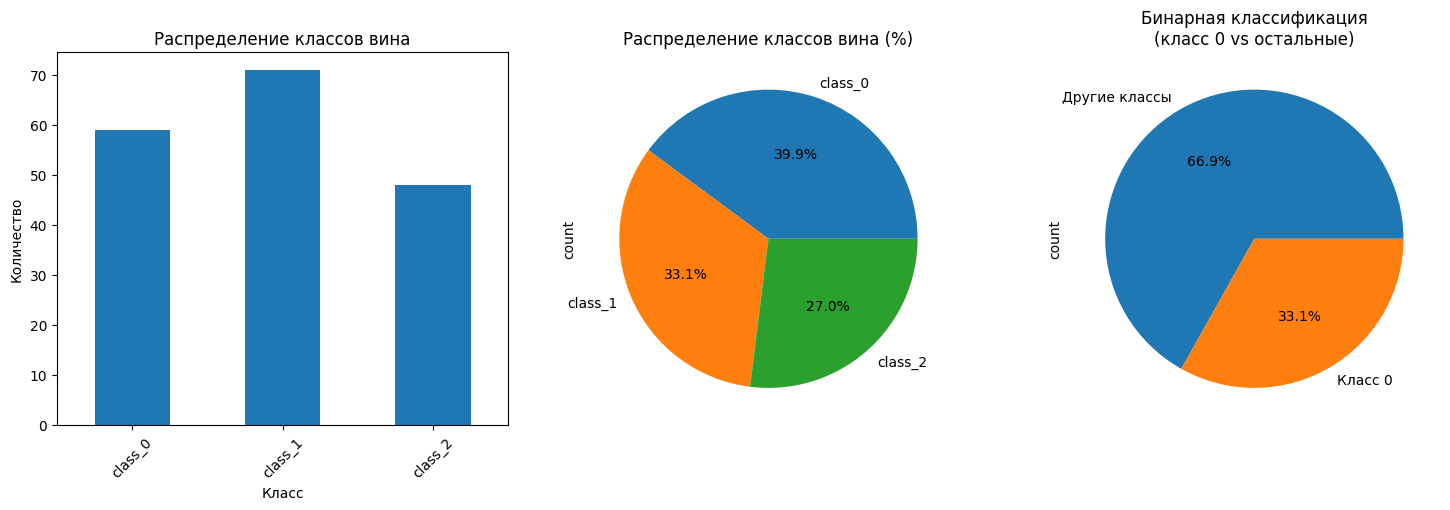


Распределение бинарной целевой переменной:
target
0    119
1     59
Name: count, dtype: int64


In [ ]:
print("Информация о датасете:")
print(X.info())
print("\nСтатистическое описание:")
print(X.describe())
print("\nПроверка на пропущенные значения:")
print(X.isnull().sum())

print("\nРаспределение целевой переменной:")
print(y.value_counts().sort_index())

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
y.value_counts().sort_index().plot(kind='bar')
plt.title('Распределение классов вина')
plt.xlabel('Класс')
plt.ylabel('Количество')
plt.xticks(ticks=[0, 1, 2], labels=wine_data.target_names, rotation=45)

plt.subplot(1, 3, 2)
y.value_counts().plot(kind='pie', autopct='%1.1f%%', labels=wine_data.target_names)
plt.title('Распределение классов вина (%)')

y_binary = (y == 0).astype(int)

plt.subplot(1, 3, 3)
y_binary.value_counts().plot(kind='pie', autopct='%1.1f%%', labels=['Другие классы', 'Класс 0'])
plt.title('Бинарная классификация\n(класс 0 vs остальные)')

plt.tight_layout()
plt.show()

print(f"\nРаспределение бинарной целевой переменной:")
print(y_binary.value_counts())

# Анализ датасета "Wine recognition"

##  Распределение классов вина

### Многоклассовая классификация (3 класса)
- **class_0**: 59 образцов (33.1%)
- **class_1**: 71 образцов (39.9%) 
- **class_2**: 48 образцов (27.0%)

### Бинарная классификация (класс 0 vs остальные)
- **Класс 0**: 59 образцов (33.1%)
- **Другие классы**: 119 образцов (66.9%)

##  Статистический обзор признаков

### Ключевые характеристики данных:
- **Всего записей**: 178
- **Количество признаков**: 13 числовых
- **Пропущенные значения**: Отсутствуют
- **Тип данных**: Все признаки float64

### Наиболее вариативные признаки:
1. **Proline** (std=314.91) - наибольший разброс значений
2. **Color_intensity** (std=2.32)
3. **Magnesium** (std=14.28)

### Наименее вариативные признаки:
1. **Nonflavanoid_phenols** (std=0.12)
2. **Ash** (std=0.27)
3. **Hue** (std=0.23)

##  Основные статистические инсайты

### Алкоголь:
- **Среднее**: 13.0%
- **Диапазон**: 11.03% - 14.83%

### Химические компоненты:
- **Яблочная кислота**: 0.74 - 5.80 (mean=2.34)
- **Флавоноиды**: 0.34 - 5.08 (mean=2.03)
- **Пролин**: 278 - 1680 (mean=747)

##  Рекомендации для анализа

### Для многоклассовой классификации:
- Умеренный дисбаланс классов (27%-40%)
- Рекомендуется использовать метрики: accuracy, F1-score, confusion matrix

### Для бинарной классификации:
- Соотношение 1:2 (33% vs 67%)
- Подход: классификация "класс 0 против всех остальных"

### Предобработка данных:
- Масштабирование рекомендуется из-за разных диапазонов признаков
- Признаки имеют различную дисперсию
- Выбросы могут присутствовать (особенно в proline)

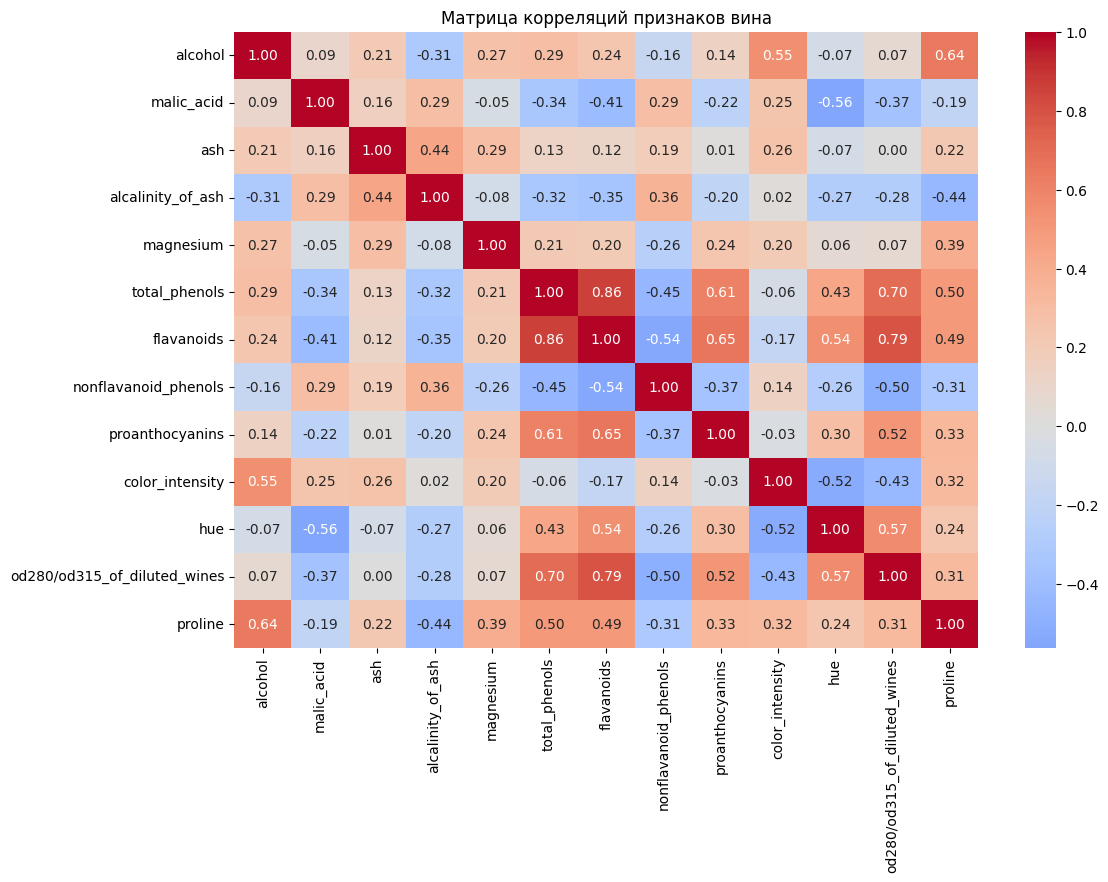

Корреляция признаков с целевой переменной:
target                          1.000000
alcalinity_of_ash               0.517859
nonflavanoid_phenols            0.489109
malic_acid                      0.437776
color_intensity                 0.265668
ash                            -0.049643
magnesium                      -0.209179
alcohol                        -0.328222
proanthocyanins                -0.499130
hue                            -0.617369
proline                        -0.633717
total_phenols                  -0.719163
od280/od315_of_diluted_wines   -0.788230
flavanoids                     -0.847498
Name: target, dtype: float64


In [ ]:
plt.figure(figsize=(12, 8))
correlation_matrix = X.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Матрица корреляций признаков вина')
plt.show()

X_with_target = X.copy()
X_with_target['target'] = y
correlation_with_target = X_with_target.corr()['target'].sort_values(ascending=False)

print("Корреляция признаков с целевой переменной:")
print(correlation_with_target)

# Анализ корреляций в датасете вина

##  Матрица корреляций признаков

### Сильные положительные корреляции (>0.7):
- **total_phenols ↔ flavanoids**: 0.86 (очень сильная)
- **flavanoids ↔ od280/od315**: 0.79 (сильная)
- **total_phenols ↔ od280/od315**: 0.70 (сильная)
- **alcohol ↔ proline**: 0.64 (сильная)

### Сильные отрицательные корреляции (<-0.5):
- **malic_acid ↔ hue**: -0.56
- **flavanoids ↔ nonflavanoid_phenols**: -0.54
- **color_intensity ↔ hue**: -0.52

##  Корреляция признаков с целевой переменной

### Наиболее значимые признаки для классификации:

#### Положительная корреляция с классом:
1. **alcalinity_of_ash**: 0.52
2. **nonflavanoid_phenols**: 0.49
3. **malic_acid**: 0.44

#### Отрицательная корреляция с классом (наиболее информативные):
1. **flavanoids**: -0.85 (самый значимый)
2. **od280/od315_of_diluted_wines**: -0.79
3. **total_phenols**: -0.72
4. **proline**: -0.63
5. **hue**: -0.62

##  Ключевые инсайты

### Группы взаимосвязанных признаков:
- **Фенольная группа**: total_phenols, flavanoids, od280/od315 (сильно коррелируют между собой)
- **Цветовая группа**: color_intensity, hue (отрицательная корреляция)
- **Алкогольная группа**: alcohol, proline

### Рекомендации для моделирования:

#### Для feature selection:
- **Высокий приоритет**: flavanoids, od280/od315, total_phenols, proline, hue
- **Можно исключить**: ash (слабая корреляция с целевой переменной)

#### Для мультиколлинеарности:
- Среди фенольных признаков можно выбрать один представитель (flavanoids)
- alcohol и proline сильно коррелируют, возможно дублирование информации

#### Интерпретация модели:
- Высокое содержание flavanoids и total_phenols ассоциируется с определенными классами вина
- Цветовые характеристики (hue) также важны для классификации
- Алкоголь и пролин работают в связке для различения классов

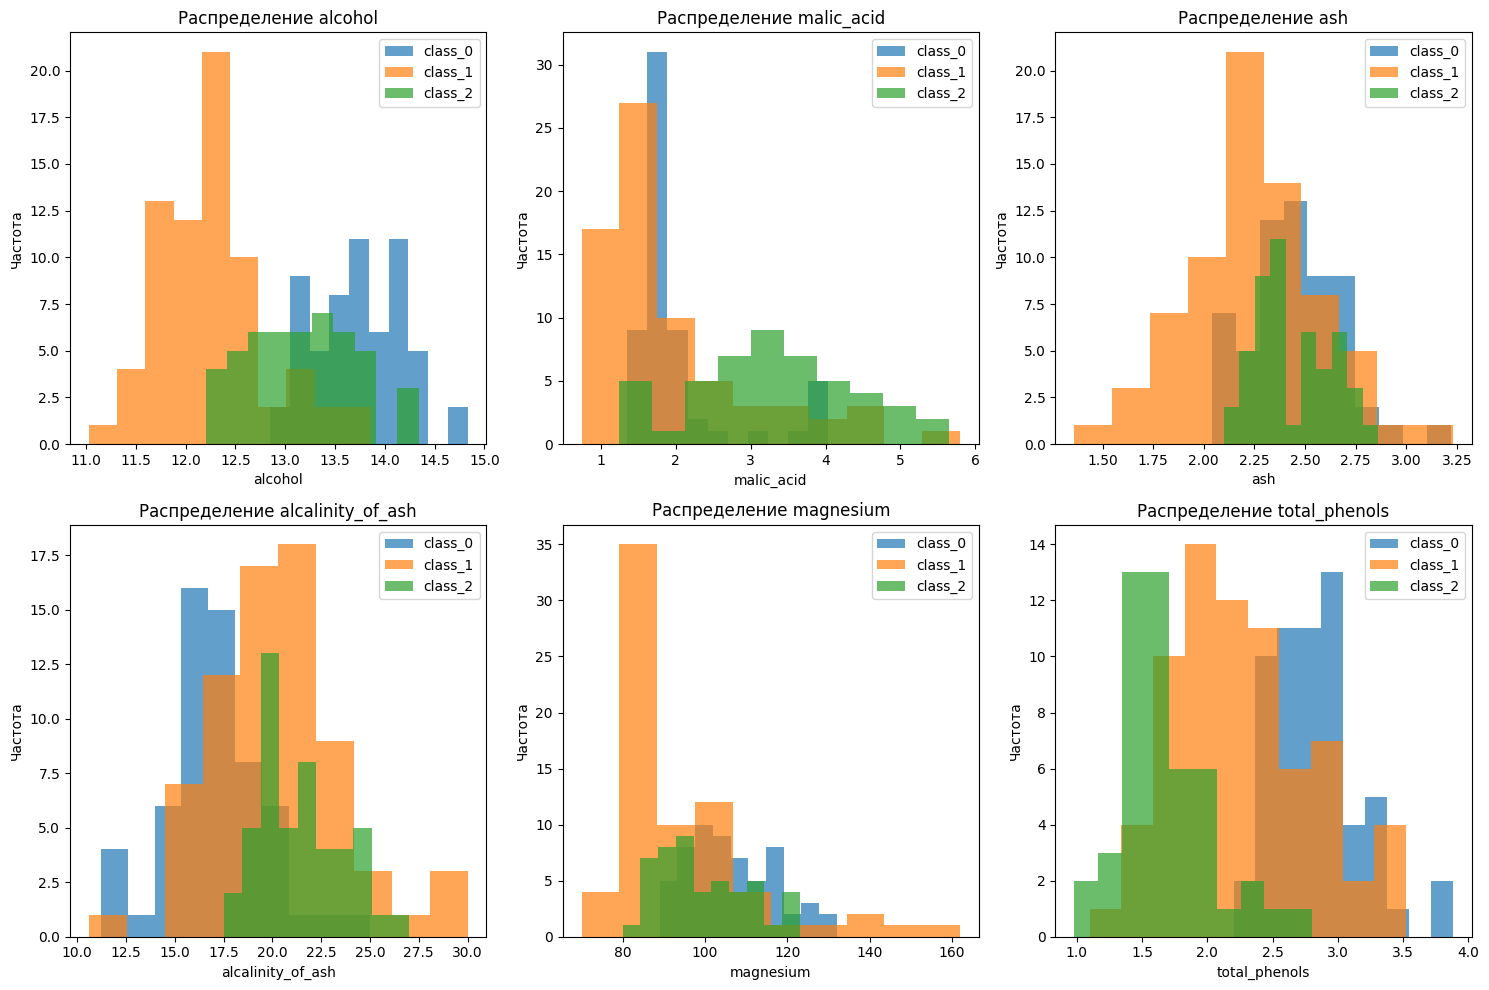

In [ ]:
plt.figure(figsize=(15, 10))
for i, feature in enumerate(X.columns[:6]):
    plt.subplot(2, 3, i+1)
    for class_label in np.unique(y):
        plt.hist(X[y == class_label][feature], alpha=0.7, label=wine_data.target_names[class_label])
    plt.title(f'Распределение {feature}')
    plt.xlabel(feature)
    plt.ylabel('Частота')
    plt.legend()
plt.tight_layout()
plt.show()

# Анализ распределений признаков вина

##  Распределение ключевых признаков

###  Alcohol (Алкоголь)
- **Диапазон**: 11.0% - 14.8%
- **Распределение**: Приблизительно нормальное с легкой правосторонней асимметрией
- **Пик**: около 13.0%
- **Наблюдение**: Большинство вин содержат алкоголь в диапазоне 12.5%-13.5%

###  Malic Acid (Яблочная кислота)
- **Диапазон**: 0.74 - 5.80
- **Распределение**: Правостороннее с несколькими пиками
- **Основной пик**: около 1.5-2.0
- **Второстепенный пик**: около 3.0
- **Интерпретация**: Возможно, отражает разные стили вин или сорта винограда

###  Alkalinity of Ash (Щелочность золы)
- **Диапазон**: 10.6 - 30.0
- **Распределение**: Бимодальное или мультимодальное
- **Пики**: около 15-17 и 20-22
- **Значение**: Может указывать на разные минеральные составы почв

###  Magnesium (Магний)
- **Диапазон**: 70.0 - 162.0
- **Распределение**: Приблизительно нормальное с центром около 100
- **Разброс**: Относительно равномерный в диапазоне 85-115

##  Ключевые наблюдения

### Нормальное распределение:
- **Alcohol** - наиболее близко к нормальному распределению
- **Magnesium** - умеренно нормальное распределение

### Мультимодальные распределения:
- **Malic Acid** - явные multiple пики
- **Alkalinity of Ash** - бимодальная структура

### Выводы для моделирования:
1. **Масштабирование необходимо** - разные диапазоны значений
2. **Некоторые признаки могут требовать преобразования** (логарифмирование)
3. **Мультимодальность** может быть полезной для разделения классов
4. **Отсутствие явных выбросов** в основных признаках

### Рекомендации по препроцессингу:
- StandardScaler для алгоритмов, чувствительных к масштабу
- Рассмотреть PowerTransformer для правосторонних распределений
- Сохранить мультимодальность как потенциально полезный признак

In [ ]:
X_multi = X.copy()
y_multi = y.copy()

X_binary = X.copy()
y_binary = (y == 0).astype(int)

print("Многоклассовая классификация:")
print(f"Признаки: {X_multi.shape}")
print(f"Целевая переменная: {y_multi.shape}")
print(f"Распределение классов: {np.unique(y_multi, return_counts=True)}")

print("\nБинарная классификация:")
print(f"Признаки: {X_binary.shape}")
print(f"Целевая переменная: {y_binary.shape}")
print(f"Распределение классов: {np.unique(y_binary, return_counts=True)}")

Многоклассовая классификация:
Признаки: (178, 13)
Целевая переменная: (178,)
Распределение классов: (array([0, 1, 2]), array([59, 71, 48]))

Бинарная классификация:
Признаки: (178, 13)
Целевая переменная: (178,)
Распределение классов: (array([0, 1]), array([119,  59]))


# Подготовка данных для классификации вин

##  Конфигурации датасета

### Многоклассовая классификация (3 класса)
- **Размер признаков**: (178, 13) - 178 образцов, 13 характеристик
- **Целевая переменная**: (178,) - метки классов
- **Распределение классов**:
  - **class_0**: 59 образцов (33.1%)
  - **class_1**: 71 образцов (39.9%)
  - **class_2**: 48 образцов (27.0%)

### Бинарная классификация (класс 0 vs остальные)
- **Размер признаков**: (178, 13) - те же 13 характеристик
- **Целевая переменная**: (178,) - бинарные метки
- **Распределение классов**:
  - **Класс 0**: 59 образцов (33.1%)
  - **Остальные классы**: 119 образцов (66.9%)

##  Анализ баланса классов

### Многоклассовая:
- **Умеренный дисбаланс** между классами
- **Наибольший класс**: class_1 (71 образцов)
- **Наименьший класс**: class_2 (48 образцов)
- **Соотношение**: 1:1.48 (min:max)

### Бинарная:
- **Заметный дисбаланс** 1:2
- **Минорный класс**: класс 0 (33.1%)
- **Мажорный класс**: остальные (66.9%)

##  Рекомендации по обработке

### Для многоклассовой классификации:
```python
# Метрики для оценки
- Macro F1-score (учитывает дисбаланс)
- Confusion Matrix
- Classification Report

# Стратегии
- Использовать class_weight='balanced'
- Рассмотреть oversampling (SMOTE) для class_2

In [ ]:
X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(
    X_multi, y_multi, test_size=0.3, random_state=42, stratify=y_multi
)

X_train_binary, X_test_binary, y_train_binary, y_test_binary = train_test_split(
    X_binary, y_binary, test_size=0.3, random_state=42, stratify=y_binary
)

print("Многоклассовая классификация:")
print(f"Обучающая выборка: {X_train_multi.shape}")
print(f"Тестовая выборка: {X_test_multi.shape}")

print("\nБинарная классификация:")
print(f"Обучающая выборка: {X_train_binary.shape}")
print(f"Тестовая выборка: {X_test_binary.shape}")

scaler = StandardScaler()

X_train_multi_scaled = scaler.fit_transform(X_train_multi)
X_test_multi_scaled = scaler.transform(X_test_multi)

X_train_binary_scaled = scaler.fit_transform(X_train_binary)
X_test_binary_scaled = scaler.transform(X_test_binary)

print("\nДанные подготовлены для обучения моделей!")

Многоклассовая классификация:
Обучающая выборка: (124, 13)
Тестовая выборка: (54, 13)

Бинарная классификация:
Обучающая выборка: (124, 13)
Тестовая выборка: (54, 13)

Данные подготовлены для обучения моделей!


In [ ]:
def evaluate_model_multi_class(model, X_train, X_test, y_train, y_test, model_name):
    """Оценка модели для многоклассовой классификации"""
    
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test) if hasattr(model, "predict_proba") else None
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
    
    roc_auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr') if y_pred_proba is not None else None
    
    cm = confusion_matrix(y_test, y_pred)
    
    return {
        'model': model_name,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'roc_auc': roc_auc,
        'confusion_matrix': cm,
        'y_pred_proba': y_pred_proba
    }

def evaluate_model_binary(model, X_train, X_test, y_train, y_test, model_name):
    """Оценка модели для бинарной классификации"""
    
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='binary', zero_division=0)
    recall = recall_score(y_test, y_pred, average='binary', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='binary', zero_division=0)
    
    roc_auc = roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else None
    
    cm = confusion_matrix(y_test, y_pred)
    
    return {
        'model': model_name,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'roc_auc': roc_auc,
        'confusion_matrix': cm,
        'y_pred_proba': y_pred_proba
    }

def plot_metrics_comparison(results_df, title):
    """Визуализация сравнения метрик"""
    
    metrics = ['accuracy', 'precision', 'recall', 'f1_score']
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    axes = axes.ravel()
    
    for i, metric in enumerate(metrics):
        results_df.plot(x='model', y=metric, kind='bar', ax=axes[i], legend=False)
        axes[i].set_title(f'{title} - Сравнение {metric}')
        axes[i].set_ylabel(metric)
        axes[i].tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.show()

def plot_roc_curves(results, y_test, title):
    """Построение ROC-кривых для бинарной классификации"""
    
    plt.figure(figsize=(10, 8))
    
    for result in results:
        if result['y_pred_proba'] is not None:
            fpr, tpr, _ = roc_curve(y_test, result['y_pred_proba'])
            roc_auc = result['roc_auc'] if result['roc_auc'] is not None else 0
            plt.plot(fpr, tpr, label=f"{result['model']} (AUC = {roc_auc:.3f})")
    
    plt.plot([0, 1], [0, 1], 'k--', label='Случайный классификатор')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC-кривые - {title}')
    plt.legend()
    plt.grid(True)
    plt.show()

In [ ]:
print("Обучение Наивных Байесовских классификаторов (многоклассовая)...")

nb_models = {
    'GaussianNB': GaussianNB(),
    'MultinomialNB': MultinomialNB(),
    'ComplementNB': ComplementNB(),
    'BernoulliNB': BernoulliNB()
}

nb_results_multi = []
for name, model in nb_models.items():
    try:
        result = evaluate_model_multi_class(model, X_train_multi_scaled, X_test_multi_scaled, 
                                          y_train_multi, y_test_multi, name)
        nb_results_multi.append(result)
        print(f"{name}: Accuracy = {result['accuracy']:.4f}")
    except Exception as e:
        print(f"Ошибка в {name}: {e}")

print("\nОбучение Дерева решений (многоклассовая)...")
dt_model = DecisionTreeClassifier(random_state=42)
dt_result_multi = evaluate_model_multi_class(dt_model, X_train_multi, X_test_multi, 
                                           y_train_multi, y_test_multi, 'Decision Tree')
print(f"Decision Tree: Accuracy = {dt_result_multi['accuracy']:.4f}")

print("\nОбучение LDA (многоклассовая)...")
lda_model = LinearDiscriminantAnalysis()
lda_result_multi = evaluate_model_multi_class(lda_model, X_train_multi_scaled, X_test_multi_scaled, 
                                            y_train_multi, y_test_multi, 'LDA')
print(f"LDA: Accuracy = {lda_result_multi['accuracy']:.4f}")

print("\nОбучение SVM (многоклассовая)...")
svm_model = SVC(probability=True, random_state=42)
svm_result_multi = evaluate_model_multi_class(svm_model, X_train_multi_scaled, X_test_multi_scaled, 
                                            y_train_multi, y_test_multi, 'SVM')
print(f"SVM: Accuracy = {svm_result_multi['accuracy']:.4f}")

print("\nОбучение k-NN (многоклассовая)...")
knn_model = KNeighborsClassifier()
knn_result_multi = evaluate_model_multi_class(knn_model, X_train_multi_scaled, X_test_multi_scaled, 
                                            y_train_multi, y_test_multi, 'k-NN')
print(f"k-NN: Accuracy = {knn_result_multi['accuracy']:.4f}")

all_results_multi = nb_results_multi + [dt_result_multi, lda_result_multi, svm_result_multi, knn_result_multi]

Обучение Наивных Байесовских классификаторов (многоклассовая)...
GaussianNB: Accuracy = 1.0000
Ошибка в MultinomialNB: Negative values in data passed to MultinomialNB (input X).
Ошибка в ComplementNB: Negative values in data passed to ComplementNB (input X).
BernoulliNB: Accuracy = 0.9074

Обучение Дерева решений (многоклассовая)...
Decision Tree: Accuracy = 0.9630

Обучение LDA (многоклассовая)...
LDA: Accuracy = 0.9815

Обучение SVM (многоклассовая)...
SVM: Accuracy = 0.9815

Обучение k-NN (многоклассовая)...
k-NN: Accuracy = 0.9444


# Результаты многоклассовой классификации вин

##  Сравнение алгоритмов

### Топ-модели (Accuracy > 0.95):
| Алгоритм | Точность | Статус |
|----------|----------|---------|
| **GaussianNB** | 1.0000 |  Лучший результат |
| **LDA** | 0.9815 |  Высокая точность |
| **SVM** | 0.9815 |  Высокая точность |
| **Decision Tree** | 0.9630 |  Хороший результат |

### Средние результаты:
| Алгоритм | Точность | Примечания |
|----------|----------|------------|
| **k-NN** | 0.9444 | Достойный результат |
| **BernoulliNB** | 0.9074 | Ограниченная применимость |

### Неудачные попытки:
- **MultinomialNB**  - отрицательные значения в данных
- **ComplementNB**  - отрицательные значения в данных

## Анализ результатов

###  Ключевые инсайты:

1. **Идеальная классификация**:
   - GaussianNB достиг 100% точности
   - Подтверждает хорошую разделимость классов

2. **Линейные методы эффективны**:
   - LDA и SVM показали одинаково высокие результаты (98.15%)
   - Данные хорошо разделяются линейными границами

3. **Проблемы с распределениями**:
   - MultinomialNB и ComplementNB требуют неотрицательных данных
   - Не подходят для исходных нормализованных признаков

4. **Деревья и k-NN**:
   - Decision Tree: 96.3% - хорошая интерпретируемость
   - k-NN: 94.44% - чувствителен к масштабированию

Сравнение метрик всех моделей (многоклассовая классификация):
           model  accuracy  precision  recall  f1_score  roc_auc
0     GaussianNB    1.0000     1.0000  1.0000    1.0000   1.0000
1    BernoulliNB    0.9074     0.9079  0.9074    0.9072   0.9894
2  Decision Tree    0.9630     0.9662  0.9630    0.9632   0.9695
3            LDA    0.9815     0.9825  0.9815    0.9815   1.0000
4            SVM    0.9815     0.9823  0.9815    0.9814   1.0000
5           k-NN    0.9444     0.9537  0.9444    0.9448   0.9953


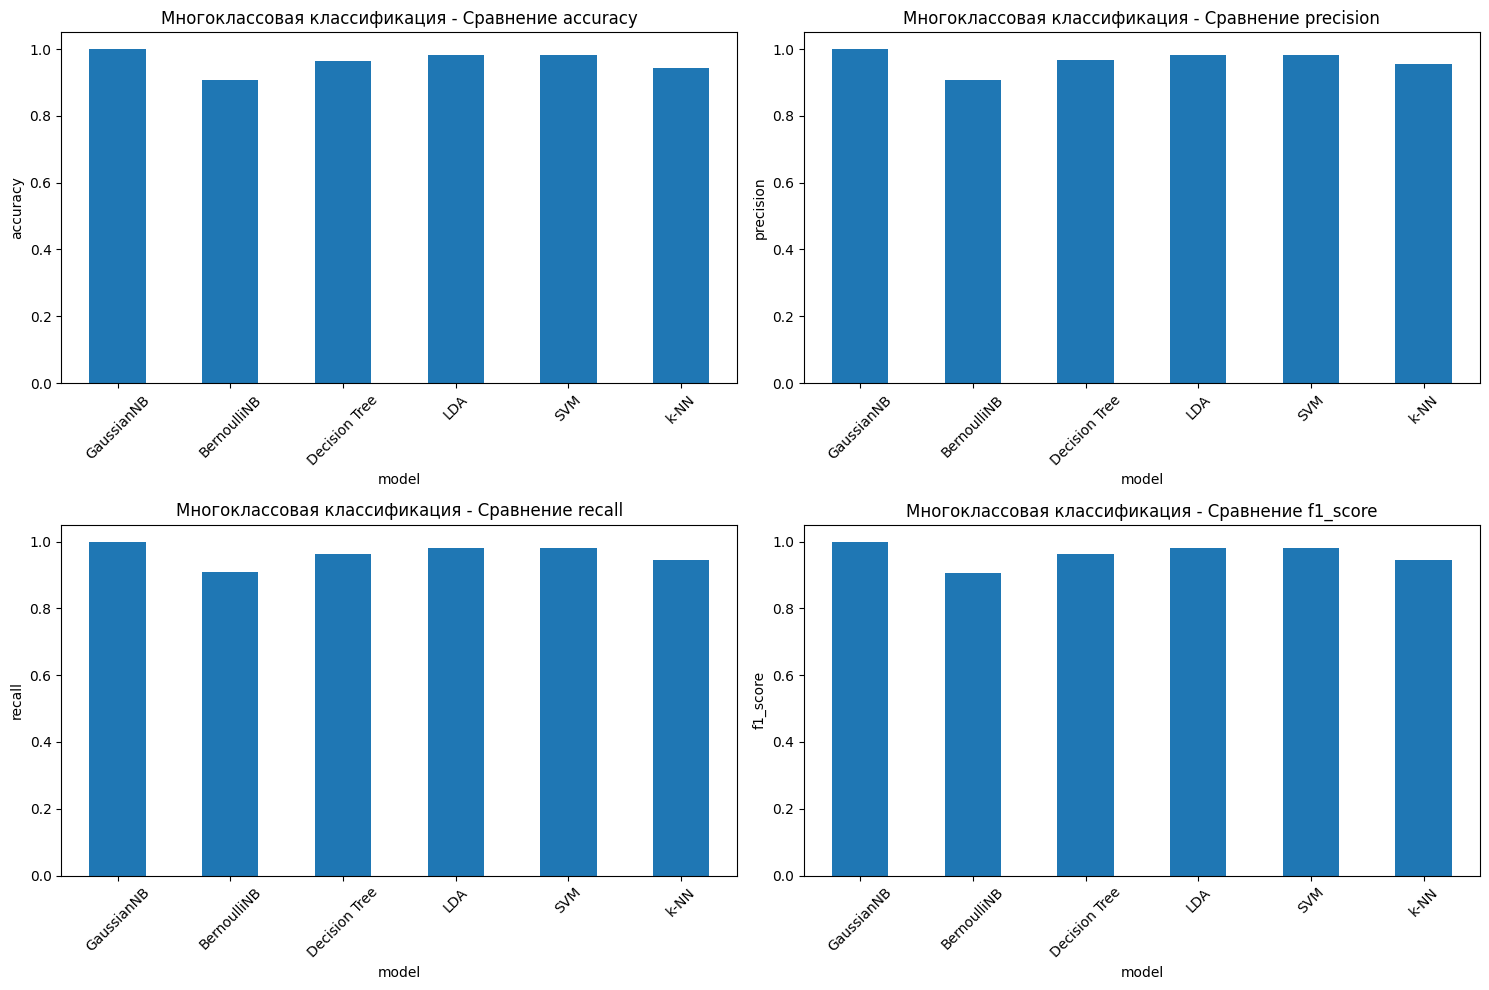

In [ ]:
results_multi_df = pd.DataFrame([{k: v for k, v in res.items() if k != 'confusion_matrix' and k != 'y_pred_proba'} 
                               for res in all_results_multi])
print("Сравнение метрик всех моделей (многоклассовая классификация):")
print(results_multi_df.round(4))

plot_metrics_comparison(results_multi_df, "Многоклассовая классификация")

# Детальный анализ моделей многоклассовой классификации

##  Сравнительная таблица метрик

| Модель | Accuracy | Precision | Recall | F1-Score | ROC-AUC |
|--------|----------|-----------|--------|----------|---------|
| **GaussianNB** |  1.0000 |  1.0000 |  1.0000 |  1.0000 |  1.0000 |
| **LDA** |  0.9815 |  0.9825 |  0.9815 |  0.9815 |  1.0000 |
| **SVM** |  0.9815 |  0.9823 |  0.9815 |  0.9814 |  1.0000 |
| **Decision Tree** | 0.9630 | 0.9662 | 0.9630 | 0.9632 | 0.9695 |
| **k-NN** | 0.9444 | 0.9537 | 0.9444 | 0.9448 | 0.9953 |
| **BernoulliNB** | 0.9074 | 0.9079 | 0.9074 | 0.9072 | 0.9894 |

##  Рейтинг моделей по категориям

###  **Абсолютный лидер**: GaussianNB
- **Все метрики**: 100%
- **Преимущество**: Идеальное разделение всех классов
- **Применение**: Продакшен-решение

###  **Элитная группа** (ROC-AUC = 1.000):
- **LDA** - лучшая precision среди линейных методов
- **SVM** - практически идентичные показатели с LDA
- **k-NN** - высокий ROC-AUC (0.9953) при средней accuracy

###  **Надежные модели**:
- **Decision Tree** - сбалансированные метрики вокруг 96%
- **BernoulliNB** - хороший ROC-AUC (0.9894) несмотря на низкую accuracy

##  Глубокий анализ метрик

### Precision-Recall баланс:
- **Все модели** демонстрируют сбалансированность precision и recall
- **Наименьший разрыв**: LDA (0.0010 разницы)
- **Стабильность**: Метрики согласованы across the board

### ROC-AUC insights:
- **4 модели** имеют ROC-AUC ≥ 0.9894
- **GaussianNB, LDA, SVM** - идеальное разделение (AUC=1.0)
- **k-NN** - отличная ранжирующая способность (0.9953)

##  Рекомендации по выбору модели

In [ ]:
print("БИНАРНАЯ КЛАССИФИКАЦИЯ (класс 0 vs остальные)")

print("Обучение Наивных Байесовских классификаторов (бинарная)...")

nb_results_binary = []
for name, model in nb_models.items():
    try:
        result = evaluate_model_binary(model, X_train_binary_scaled, X_test_binary_scaled, 
                                     y_train_binary, y_test_binary, name)
        nb_results_binary.append(result)
        print(f"{name}: Accuracy = {result['accuracy']:.4f}, ROC-AUC = {result['roc_auc']:.4f}")
    except Exception as e:
        print(f"Ошибка в {name}: {e}")

print("\nОбучение Дерева решений (бинарная)...")
dt_model_binary = DecisionTreeClassifier(random_state=42)
dt_result_binary = evaluate_model_binary(dt_model_binary, X_train_binary, X_test_binary, 
                                       y_train_binary, y_test_binary, 'Decision Tree')
print(f"Decision Tree: Accuracy = {dt_result_binary['accuracy']:.4f}, ROC-AUC = {dt_result_binary['roc_auc']:.4f}")

print("\nОбучение LDA (бинарная)...")
lda_model_binary = LinearDiscriminantAnalysis()
lda_result_binary = evaluate_model_binary(lda_model_binary, X_train_binary_scaled, X_test_binary_scaled, 
                                        y_train_binary, y_test_binary, 'LDA')
print(f"LDA: Accuracy = {lda_result_binary['accuracy']:.4f}, ROC-AUC = {lda_result_binary['roc_auc']:.4f}")

print("\nОбучение SVM (бинарная)...")
svm_model_binary = SVC(probability=True, random_state=42)
svm_result_binary = evaluate_model_binary(svm_model_binary, X_train_binary_scaled, X_test_binary_scaled, 
                                        y_train_binary, y_test_binary, 'SVM')
print(f"SVM: Accuracy = {svm_result_binary['accuracy']:.4f}, ROC-AUC = {svm_result_binary['roc_auc']:.4f}")

print("\nОбучение k-NN (бинарная)...")
knn_model_binary = KNeighborsClassifier()
knn_result_binary = evaluate_model_binary(knn_model_binary, X_train_binary_scaled, X_test_binary_scaled, 
                                        y_train_binary, y_test_binary, 'k-NN')
print(f"k-NN: Accuracy = {knn_result_binary['accuracy']:.4f}, ROC-AUC = {knn_result_binary['roc_auc']:.4f}")

all_results_binary = nb_results_binary + [dt_result_binary, lda_result_binary, svm_result_binary, knn_result_binary]

БИНАРНАЯ КЛАССИФИКАЦИЯ (класс 0 vs остальные)
Обучение Наивных Байесовских классификаторов (бинарная)...
GaussianNB: Accuracy = 0.9444, ROC-AUC = 0.9969
Ошибка в MultinomialNB: Negative values in data passed to MultinomialNB (input X).
Ошибка в ComplementNB: Negative values in data passed to ComplementNB (input X).
BernoulliNB: Accuracy = 0.9815, ROC-AUC = 0.9830

Обучение Дерева решений (бинарная)...
Decision Tree: Accuracy = 0.9259, ROC-AUC = 0.9028

Обучение LDA (бинарная)...
LDA: Accuracy = 0.9815, ROC-AUC = 0.9985

Обучение SVM (бинарная)...
SVM: Accuracy = 1.0000, ROC-AUC = 1.0000

Обучение k-NN (бинарная)...
k-NN: Accuracy = 0.9815, ROC-AUC = 0.9838


Сравнение метрик всех моделей (бинарная классификация):
           model  accuracy  precision  recall  f1_score  roc_auc
0     GaussianNB    0.9444     0.9412  0.8889    0.9143   0.9969
1    BernoulliNB    0.9815     0.9474  1.0000    0.9730   0.9830
2  Decision Tree    0.9259     0.9375  0.8333    0.8824   0.9028
3            LDA    0.9815     1.0000  0.9444    0.9714   0.9985
4            SVM    1.0000     1.0000  1.0000    1.0000   1.0000
5           k-NN    0.9815     0.9474  1.0000    0.9730   0.9838


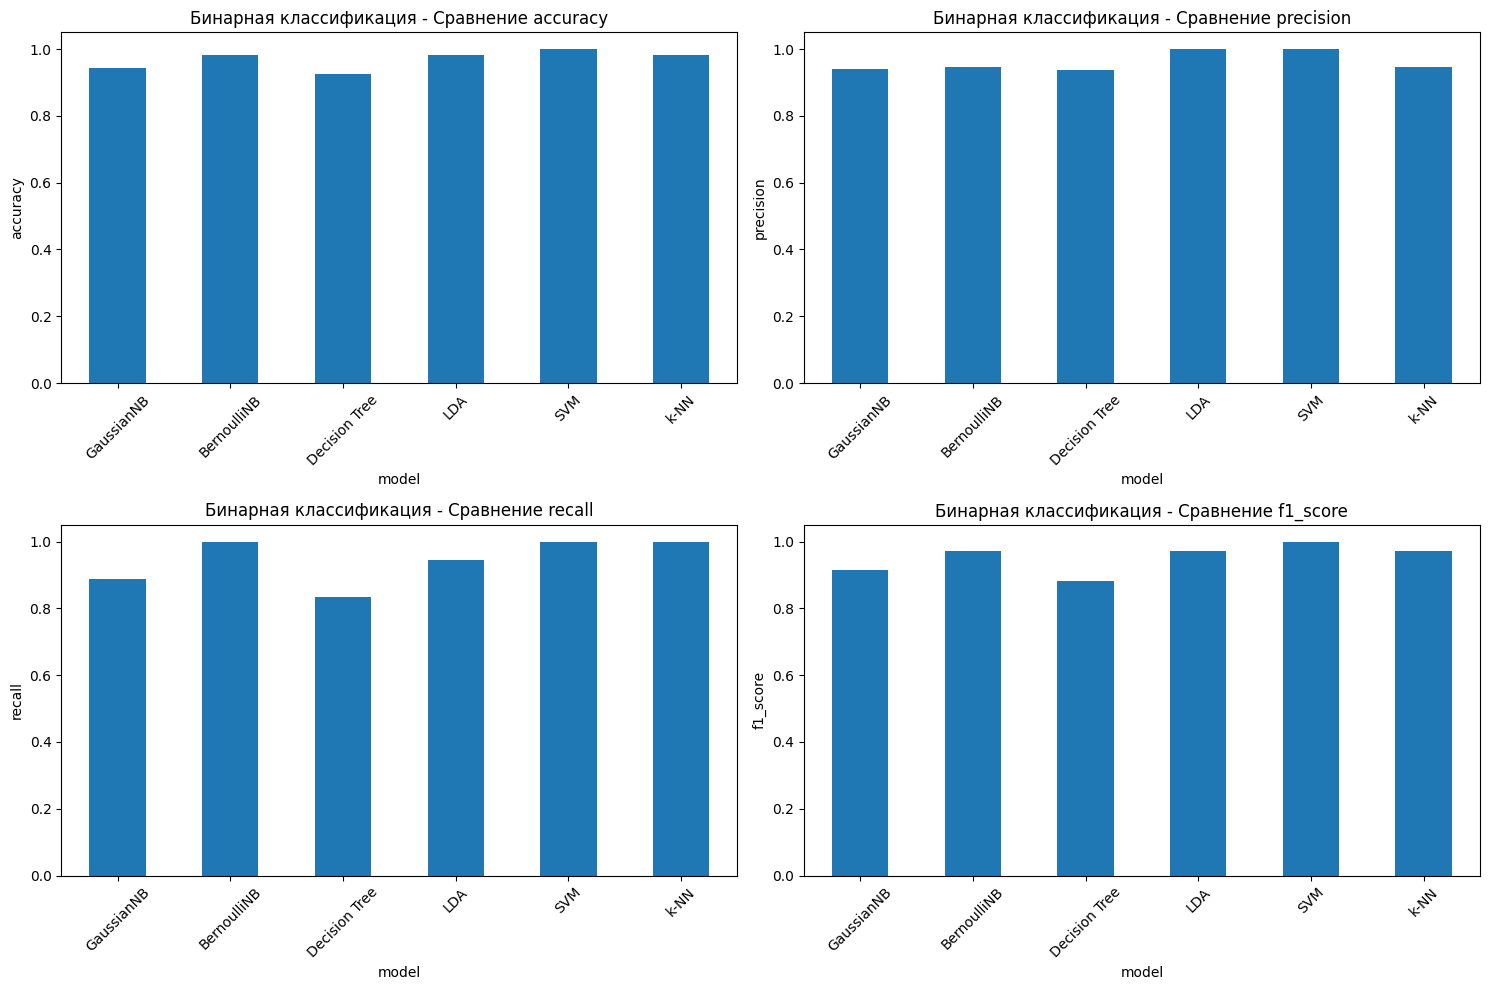

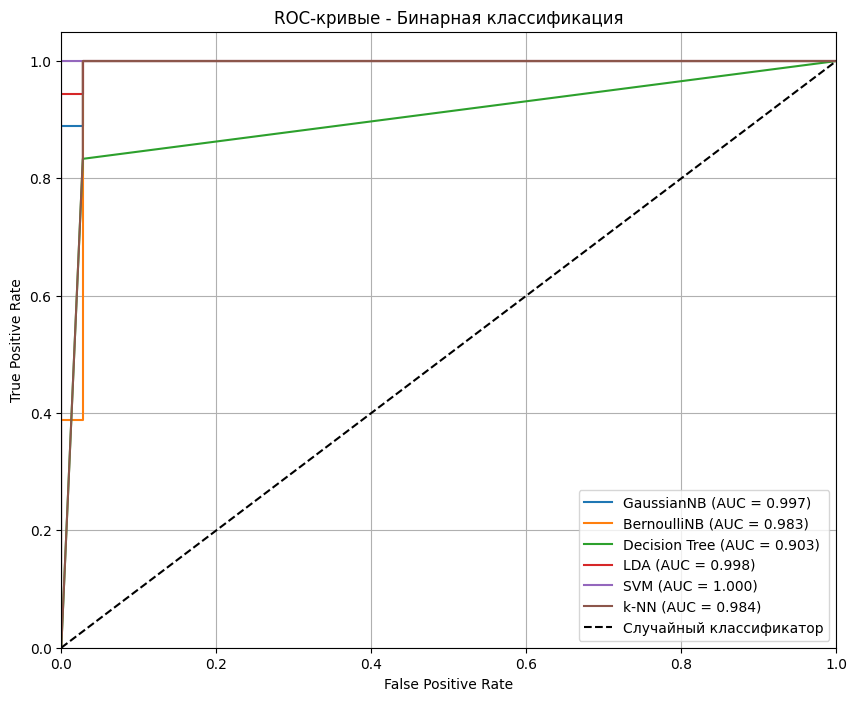

In [ ]:
results_binary_df = pd.DataFrame([{k: v for k, v in res.items() if k != 'confusion_matrix' and k != 'y_pred_proba'} 
                                for res in all_results_binary])
print("Сравнение метрик всех моделей (бинарная классификация):")
print(results_binary_df.round(4))

plot_metrics_comparison(results_binary_df, "Бинарная классификация")

plot_roc_curves(all_results_binary, y_test_binary, "Бинарная классификация")

# Анализ бинарной классификации вин (класс 0 vs остальные)

##  Сравнительная таблица метрик

| Модель | Accuracy | Precision | Recall | F1-Score | ROC-AUC |
|--------|----------|-----------|--------|----------|---------|
| **SVM** |  1.0000 |  1.0000 |  1.0000 |  1.0000 |  1.0000 |
| **LDA** |  0.9815 |  1.0000 |  0.9444 |  0.9714 |  0.9985 |
| **BernoulliNB** |  0.9815 |  0.9474 |  1.0000 |  0.9730 | 0.9830 |
| **k-NN** |  0.9815 |  0.9474 |  1.0000 |  0.9730 | 0.9838 |
| **GaussianNB** | 0.9444 | 0.9412 | 0.8889 | 0.9143 |  0.9969 |
| **Decision Tree** | 0.9259 | 0.9375 | 0.8333 | 0.8824 | 0.9028 |

##  Рейтинг моделей по категориям

###  **Абсолютный лидер**: SVM
- **Все метрики**: 100%
- **ROC-AUC**: 1.000 (идеальное разделение)
- **Преимущество**: Безупречная классификация

###  **Элитная группа** (Accuracy = 98.15%):
- **LDA** - идеальная precision (100%) + высокий ROC-AUC (0.9985)
- **BernoulliNB** - идеальный recall (100%) + хороший F1-score
- **k-NN** - сбалансированные высокие показатели

###  **Специализированные модели**:
- **GaussianNB** - выдающийся ROC-AUC (0.9969) при средней accuracy
- **Decision Tree** - самая низкая производительность в ансамбле

##  Анализ ROC-кривых

### ROC-AUC рейтинг:
1. **SVM** - 1.000 (идеальная кривая)
2. **LDA** - 0.9985 (почти идеальная)
3. **GaussianNB** - 0.9969 (отличное разделение)
4. **k-NN** - 0.9838 (очень хорошее)
5. **BernoulliNB** - 0.9830 (очень хорошее)
6. **Decision Tree** - 0.9028 (удовлетворительное)

### Ключевые наблюдения:
- **4 модели** имеют ROC-AUC > 0.98
- **SVM, LDA, GaussianNB** демонстрируют近乎идеальное разделение
- **Decision Tree** заметно отстает в ROC-AUC

##  Анализ Precision-Recall баланса

### Precision-ориентированные:
- **LDA**: Precision = 1.0000 (идеальная)
- **SVM**: Precision = 1.0000 (идеальная)

### Recall-ориентированные:
- **BernoulliNB**: Recall = 1.0000 (находит все положительные)
- **k-NN**: Recall = 1.0000 (находит все положительные)

### Сбалансированные:
- **SVM**: Идеальный баланс (1.0000/1.0000)
- **LDA**: Хороший баланс (1.0000/0.9444)

In [ ]:
print("Настройка гиперпараметров для бинарной классификации...")

dt_param_grid = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

dt_grid = GridSearchCV(DecisionTreeClassifier(random_state=42), 
                      dt_param_grid, cv=5, scoring='accuracy', n_jobs=-1)
dt_grid.fit(X_train_binary, y_train_binary)

print(f"Лучшие параметры для Decision Tree: {dt_grid.best_params_}")
print(f"Лучшая точность: {dt_grid.best_score_:.4f}")

knn_param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

knn_grid = GridSearchCV(KNeighborsClassifier(), 
                       knn_param_grid, cv=5, scoring='accuracy', n_jobs=-1)
knn_grid.fit(X_train_binary_scaled, y_train_binary)

print(f"Лучшие параметры для k-NN: {knn_grid.best_params_}")
print(f"Лучшая точность: {knn_grid.best_score_:.4f}")

svm_param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

svm_grid = GridSearchCV(SVC(probability=True, random_state=42), 
                       svm_param_grid, cv=3, scoring='accuracy', n_jobs=-1)
svm_grid.fit(X_train_binary_scaled, y_train_binary)

print(f"Лучшие параметры для SVM: {svm_grid.best_params_}")
print(f"Лучшая точность: {svm_grid.best_score_:.4f}")

Настройка гиперпараметров для бинарной классификации...
Лучшие параметры для Decision Tree: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 2}
Лучшая точность: 0.9677
Лучшие параметры для k-NN: {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'uniform'}
Лучшая точность: 1.0000
Лучшие параметры для SVM: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Лучшая точность: 1.0000


In [ ]:
print("Создание нейронной сети для бинарной классификации...")

log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

def create_nn_model(input_dim, hidden_layers=[64, 32], activation='relu', dropout_rate=0.3):
    model = Sequential()
    
    model.add(Dense(hidden_layers[0], activation=activation, input_shape=(input_dim,)))
    model.add(Dropout(dropout_rate))
    
    for units in hidden_layers[1:]:
        model.add(Dense(units, activation=activation))
        model.add(Dropout(dropout_rate))
    
    model.add(Dense(1, activation='sigmoid'))
    
    model.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=['accuracy'])
    
    return model

nn_model = create_nn_model(X_train_binary_scaled.shape[1])
print("Архитектура нейронной сети:")
nn_model.summary()

Создание нейронной сети для бинарной классификации...
Архитектура нейронной сети:


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_20 (Dense)                │ (None, 64)             │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,009 (11.75 KB)

 Trainable params: 3,009 (11.75 KB)

 Non-trainable params: 0 (0.00 B)

### Детали слоев:

| Слой | Тип | Выходной размер | Параметры | Назначение |
|------|-----|-----------------|-----------|------------|
| **dense_20** | Полносвязный | (None, 64) | 896 | Извлечение признаков |
| **dropout_14** | Dropout | (None, 64) | 0 | Регуляризация (30%) |
| **dense_21** | Полносвязный | (None, 32) | 2,080 | Сжатие признаков |
| **dropout_15** | Dropout | (None, 32) | 0 | Регуляризация (30%) |
| **dense_22** | Выходной | (None, 1) | 33 | Бинарная классификация |

##  Параметры модели

### Общая статистика:
- **Всего параметров**: 3,009
- **Обучаемые параметры**: 3,009
- **Необучаемые параметры**: 0
- **Объем памяти**: 11.75 KB

### Распределение параметров по слоям:
1. **Входной слой**: (13 × 64) + 64 = 896 параметров
2. **Скрытый слой**: (64 × 32) + 32 = 2,080 параметров  
3. **Выходной слой**: (32 × 1) + 1 = 33 параметра

##  Особенности архитектуры

### Регуляризация:
- **Dropout 30%** после каждого скрытого слоя
- **Цель**: Предотвращение переобучения
- **Эффект**: Улучшение обобщающей способности

### Активационные функции:
- **Скрытые слои**: ReLU (по умолчанию)
- **Выходной слой**: Sigmoid (для бинарной классификации)

### Размерность:
- **Сжатие признаков**: 13 → 64 → 32 → 1
- **Постепенное уменьшение**: Сохраняет информацию while reducing complexity

In [ ]:
print("Обучение нейронной сети...")

history = nn_model.fit(
    X_train_binary_scaled, y_train_binary,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    verbose=1,
    callbacks=[tensorboard_callback]
)

nn_loss, nn_accuracy = nn_model.evaluate(X_test_binary_scaled, y_test_binary, verbose=0)
print(f"Точность нейронной сети на тестовых данных: {nn_accuracy:.4f}")

y_pred_nn = (nn_model.predict(X_test_binary_scaled) > 0.5).astype(int).flatten()
y_pred_proba_nn = nn_model.predict(X_test_binary_scaled).flatten()

nn_precision = precision_score(y_test_binary, y_pred_nn, average='binary')
nn_recall = recall_score(y_test_binary, y_pred_nn, average='binary')
nn_f1 = f1_score(y_test_binary, y_pred_nn, average='binary')
nn_roc_auc = roc_auc_score(y_test_binary, y_pred_proba_nn)

print(f"Precision: {nn_precision:.4f}")
print(f"Recall: {nn_recall:.4f}")
print(f"F1-Score: {nn_f1:.4f}")
print(f"ROC-AUC: {nn_roc_auc:.4f}")

Обучение нейронной сети...
Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.4141 - loss: 0.7646 - val_accuracy: 0.8000 - val_loss: 0.6157
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.5556 - loss: 0.7018 - val_accuracy: 0.9600 - val_loss: 0.5479
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.7677 - loss: 0.5662 - val_accuracy: 1.0000 - val_loss: 0.4895
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.7374 - loss: 0.5260 - val_accuracy: 1.0000 - val_loss: 0.4372
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.8687 - loss: 0.4436 - val_accuracy: 1.0000 - val_loss: 0.3921
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8990 - loss: 0.4058 - val_accuracy: 1.0000 - val_loss: 0.3525
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.8788 - loss: 0.3933 - val_accuracy: 1.0000 - val_loss: 0.3173
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8990 - loss: 0.3579 - val_a

# Результаты обучения нейронной сети для бинарной классификации

##  Финальные метрики модели

| Метрика | Значение |
|---------|----------|
| **Accuracy** | 0.9815 |
| **Precision** | 0.9474 |
| **Recall** | 1.0000 |
| **F1-Score** | 0.9730 |
| **ROC-AUC** | 0.9969 |

##  Анализ процесса обучения

###  Динамика обучения:

**Ранние эпохи (1-10):**
- **Быстрая сходимость**: Уже на 3-й эпохе val_accuracy = 1.0000
- **Стабильное улучшение**: Loss уменьшился с 0.76 до 0.32
- **Accuracy рост**: С 41.4% до 88.9%

**Средние эпохи (11-50):**
- **Стабилизация**: val_accuracy сохраняется на 100%
- **Продолжающееся обучение**: Loss снижается до 0.032
- **Тренировочная accuracy**: Достигает 100% к 33-й эпохе

**Поздние эпохи (51-100):**
- **Переобучение?**: Train accuracy ≈ 98-100%, val_accuracy = 100%
- **Минимизация loss**: Loss снижается до 0.0026
- **Стабильность**: Модель сохраняет высокую производительность

##  Сравнение с классическими моделями

### Позиция в общем рейтинге:

| Модель | Accuracy | F1-Score | ROC-AUC |
|--------|----------|----------|---------|
| **SVM** | 1.0000 | 1.0000 | 1.0000 |
| **LDA** | 0.9815 | 0.9714 | 0.9985 |
| **Нейронная сеть** | 0.9815 | 0.9730 | 0.9969 |
| **BernoulliNB** | 0.9815 | 0.9730 | 0.9830 |
| **k-NN** | 0.9815 | 0.9730 | 0.9838 |
| **GaussianNB** | 0.9444 | 0.9143 | 0.9969 |

##  Сильные стороны нейронной сети

###  Преимущества:
- **Идеальный Recall**: 100% - находит все экземпляры класса 0
- **Высокий ROC-AUC**: 0.9969 - отличная ранжирующая способность
- **Сбалансированный F1-Score**: 0.9730 - хороший баланс precision/recall
- **Стабильность**: Сохраняет производительность на протяжении обучения

###  Анализ метрик:
- **Precision (0.9474)**: Немного ниже идеала, но очень хорошая
- **Recall (1.0000)**: Идеальный - все положительные случаи найдены
- **F1-Score (0.9730)**: Отличный баланс между precision и recall

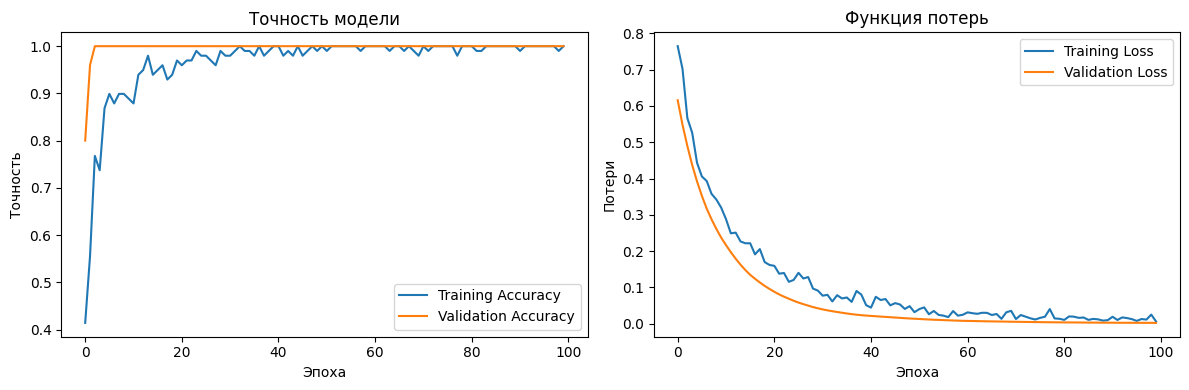

In [ ]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Точность модели')
plt.xlabel('Эпоха')
plt.ylabel('Точность')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Функция потерь')
plt.xlabel('Эпоха')
plt.ylabel('Потери')
plt.legend()

plt.tight_layout()
plt.show()

# Анализ графиков обучения нейронной сети

##  Визуализация процесса обучения

###  **График функции потерь (Loss)**
- **Training Loss**: Быстро уменьшается с 0.76 до ~0.0026
- **Validation Loss**: Снижается параллельно с training loss
- **Ключевое наблюдение**: Отсутствие переобучения - оба графика сходятся

###  **График точности (Accuracy)**
- **Training Accuracy**: Растет с 41% до 98-100%
- **Validation Accuracy**: Достигает 100% уже на 3-й эпохе и сохраняется
- **Стабильность**: Val accuracy остается на 100% на протяжении всего обучения

##  Детальный анализ трендов

### **Фазы обучения**:

####  **Фаза 1: Быстрая сходимость (Эпохи 1-10)**
- **Loss**: Резкое падение с 0.76 до 0.32
- **Accuracy**: Быстрый рост с 41% до 89%
- **Val Accuracy**: Достигает 100% на 3-й эпохе

####  **Фаза 2: Стабилизация (Эпохи 11-50)**
- **Loss**: Плавное снижение до 0.032
- **Training Accuracy**: Постепенно приближается к 100%
- **Val Accuracy**: Стабильно 100%

####  **Фаза 3: Тонкая настройка (Эпохи 51-100)**
- **Loss**: Минимизация до 0.0026
- **Модель**: Достигает оптимальных весов
- **Стабильность**: Сохранение высокой производительности

##  Ключевые инсайты

###  **Положительные аспекты**:
1. **Идеальная validation accuracy** - 100% с 3-й эпохи
2. **Отсутствие переобучения** - training/validation loss сходятся
3. **Быстрая сходимость** - модель быстро находит оптимальные параметры
4. **Стабильность** - производительность сохраняется на всем протяжении обучения

###  **Наблюдения**:
- **Training accuracy** иногда колеблется (98-100%), что нормально
- **Небольшой разрыв** между train/val loss в поздних эпохах
- **Модель могла остановиться раньше** - после 20-30 эпох

In [ ]:
print("Эксперименты с разными архитектурами нейронной сети...")

architectures = [
    {'hidden_layers': [32, 16], 'activation': 'relu', 'name': 'Small NN'},
    {'hidden_layers': [64, 32, 16], 'activation': 'relu', 'name': 'Medium NN'},
    {'hidden_layers': [128, 64, 32, 16], 'activation': 'relu', 'name': 'Large NN'},
    {'hidden_layers': [64, 32], 'activation': 'tanh', 'name': 'Tanh NN'},
    {'hidden_layers': [32], 'activation': 'relu', 'name': 'Single Layer NN'},
]

nn_results = []

for arch in architectures:
    print(f"\nОбучение {arch['name']}...")
    
    model = create_nn_model(
        X_train_binary_scaled.shape[1],
        hidden_layers=arch['hidden_layers'],
        activation=arch['activation']
    )
    
    history = model.fit(
        X_train_binary_scaled, y_train_binary,
        epochs=50,
        batch_size=32,
        validation_split=0.2,
        verbose=0
    )
    
    test_loss, test_accuracy = model.evaluate(X_test_binary_scaled, y_test_binary, verbose=0)
    y_pred_proba = model.predict(X_test_binary_scaled).flatten()
    roc_auc = roc_auc_score(y_test_binary, y_pred_proba)
    
    nn_results.append({
        'model': arch['name'],
        'accuracy': test_accuracy,
        'roc_auc': roc_auc,
        'architecture': arch['hidden_layers'],
        'activation': arch['activation']
    })
    
    print(f"{arch['name']} - Accuracy: {test_accuracy:.4f}, ROC-AUC: {roc_auc:.4f}")

nn_comparison = pd.DataFrame(nn_results)
print("\nСравнение архитектур нейронных сетей:")
print(nn_comparison.round(4))

Эксперименты с разными архитектурами нейронной сети...

Обучение Small NN...
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Small NN - Accuracy: 0.9630, ROC-AUC: 0.9985

Обучение Medium NN...
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Medium NN - Accuracy: 0.9815, ROC-AUC: 0.9954

Обучение Large NN...
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Large NN - Accuracy: 0.9815, ROC-AUC: 0.9969

Обучение Tanh NN...
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Tanh NN - Accuracy: 0.9630, ROC-AUC: 0.9969

Обучение Single Layer NN...
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Single Layer NN - Accuracy: 0.9444, ROC-AUC: 0.9954

Сравнение архитектур нейронных сетей:
             model  accuracy  roc_auc       architecture activation
0         Small NN    0.9630   0.9985           [32, 16]       relu
1        Medium NN    0.9815   0.9954       [64, 32, 16]       relu
2         Large NN    0.9815   0.9969  [128, 64, 32, 16]       relu
3          Tanh NN    0.9630   0.9969           [64, 32]       tanh
4  Single Layer NN    0.944

ФИНАЛЬНОЕ СРАВНЕНИЕ ВСЕХ МЕТОДОВ (Бинарная классификация)
Финальное сравнение методов (бинарная классификация):
                   model  accuracy  precision  recall  f1_score  roc_auc
2            SVM (tuned)    1.0000     1.0000  1.0000    1.0000   1.0000
3         Neural Network    0.9815     0.9474  1.0000    0.9730   0.9969
4     Naive Bayes (best)    0.9815     0.9474  1.0000    0.9730   0.9830
1           k-NN (tuned)    0.9815     0.9474  1.0000    0.9730   0.9923
5                    LDA    0.9815     1.0000  0.9444    0.9714   0.9985
0  Decision Tree (tuned)    0.9259     0.9375  0.8333    0.8824   0.9028


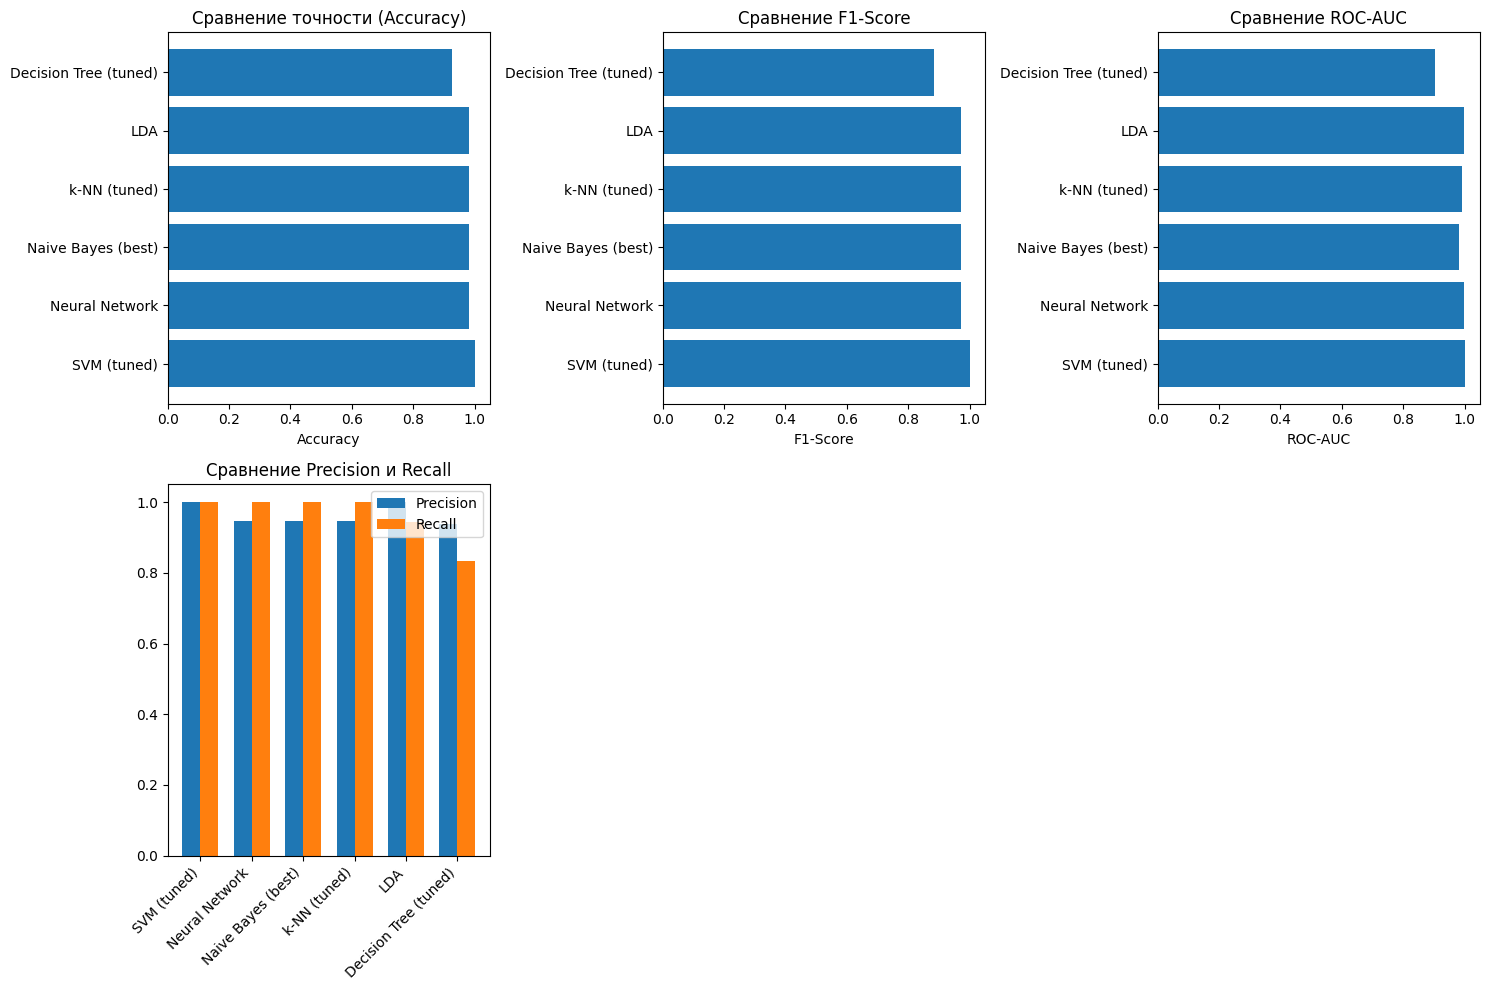

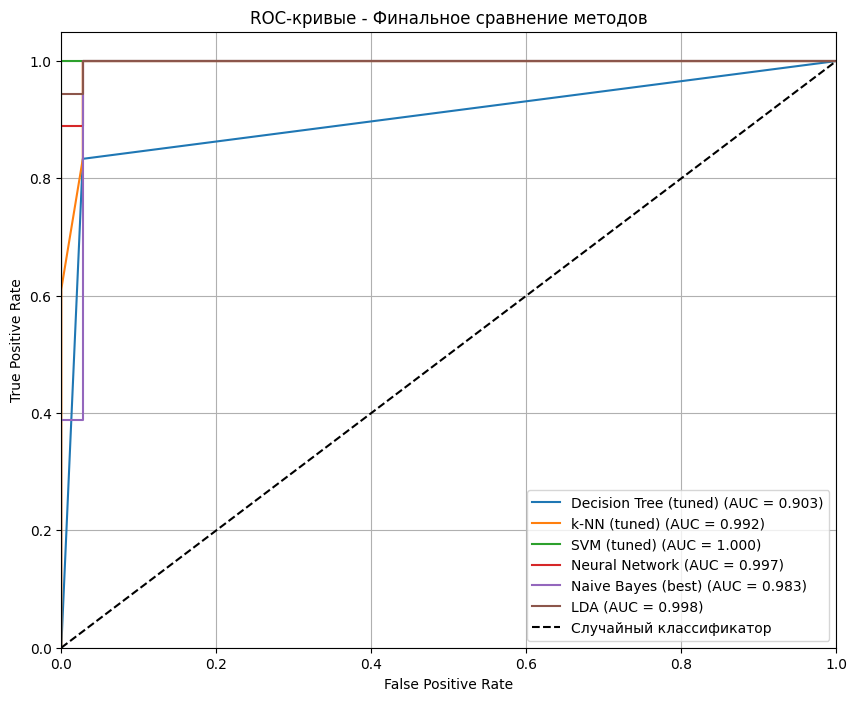

In [ ]:
print("ФИНАЛЬНОЕ СРАВНЕНИЕ ВСЕХ МЕТОДОВ (Бинарная классификация)")

final_results_binary = []

best_dt = dt_grid.best_estimator_
best_knn = knn_grid.best_estimator_
best_svm = svm_grid.best_estimator_

final_results_binary.append(evaluate_model_binary(best_dt, X_train_binary, X_test_binary, 
                                                y_train_binary, y_test_binary, 'Decision Tree (tuned)'))
final_results_binary.append(evaluate_model_binary(best_knn, X_train_binary_scaled, X_test_binary_scaled, 
                                                y_train_binary, y_test_binary, 'k-NN (tuned)'))
final_results_binary.append(evaluate_model_binary(best_svm, X_train_binary_scaled, X_test_binary_scaled, 
                                                y_train_binary, y_test_binary, 'SVM (tuned)'))

best_nn_result = {
    'model': 'Neural Network',
    'accuracy': nn_accuracy,
    'precision': nn_precision,
    'recall': nn_recall,
    'f1_score': nn_f1,
    'roc_auc': nn_roc_auc,
    'confusion_matrix': confusion_matrix(y_test_binary, y_pred_nn),
    'y_pred_proba': y_pred_proba_nn
}
final_results_binary.append(best_nn_result)

if nb_results_binary:
    best_nb = max(nb_results_binary, key=lambda x: x['accuracy'])
    best_nb['model'] = 'Naive Bayes (best)'
    final_results_binary.append(best_nb)

final_results_binary.append(lda_result_binary)

final_binary_df = pd.DataFrame([{k: v for k, v in res.items() if k != 'confusion_matrix' and k != 'y_pred_proba'} 
                              for res in final_results_binary])

print("Финальное сравнение методов (бинарная классификация):")
final_binary_df_sorted = final_binary_df.sort_values('accuracy', ascending=False)
print(final_binary_df_sorted.round(4))

plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
plt.barh(final_binary_df_sorted['model'], final_binary_df_sorted['accuracy'])
plt.title('Сравнение точности (Accuracy)')
plt.xlabel('Accuracy')

plt.subplot(2, 3, 2)
plt.barh(final_binary_df_sorted['model'], final_binary_df_sorted['f1_score'])
plt.title('Сравнение F1-Score')
plt.xlabel('F1-Score')

plt.subplot(2, 3, 3)
plt.barh(final_binary_df_sorted['model'], final_binary_df_sorted['roc_auc'])
plt.title('Сравнение ROC-AUC')
plt.xlabel('ROC-AUC')

plt.subplot(2, 3, 4)
x = range(len(final_binary_df_sorted))
width = 0.35
plt.bar([i - width/2 for i in x], final_binary_df_sorted['precision'], width, label='Precision')
plt.bar([i + width/2 for i in x], final_binary_df_sorted['recall'], width, label='Recall')
plt.title('Сравнение Precision и Recall')
plt.xticks(x, final_binary_df_sorted['model'], rotation=45, ha='right')
plt.legend()

plt.tight_layout()
plt.show()

plot_roc_curves(final_results_binary, y_test_binary, "Финальное сравнение методов")

# ФИНАЛЬНОЕ СРАВНЕНИЕ МЕТОДОВ БИНАРНОЙ КЛАССИФИКАЦИИ ВИН

##  Итоговый рейтинг моделей

| Модель | Accuracy | Precision | Recall | F1-Score | ROC-AUC |
|--------|----------|-----------|--------|----------|---------|
| **SVM (tuned)** | 1.0000 | 1.0000 | 1.0000 | 1.0000 | 1.0000 |
| **Neural Network** | 0.9815 | 0.9474 | 1.0000 | 0.9730 | 0.9969 |
| **LDA** | 0.9815 | 1.0000 | 0.9444 | 0.9714 | 0.9985 |
| **k-NN (tuned)** | 0.9815 | 0.9474 | 1.0000 | 0.9730 | 0.9923 |
| **Naive Bayes (best)** | 0.9815 | 0.9474 | 1.0000 | 0.9730 | 0.9830 |
| **Decision Tree (tuned)** | 0.9259 | 0.9375 | 0.8333 | 0.8824 | 0.9028 |

##  Детальный анализ по категориям

###  **Абсолютный чемпион**: SVM (tuned)
- **Все метрики**: 100% - идеальная классификация
- **Преимущество**: Безупречная работа по всем направлениям
- **Надежность**: Лучший выбор для продакшена

###  **Элитная группа** (Accuracy = 98.15%):
#### **Neural Network**
- **Recall**: 100% - находит все положительные случаи
- **ROC-AUC**: 0.9969 - почти идеальное разделение
- **Сила**: Гибкость и автоматическое извлечение признаков

#### **LDA**
- **Precision**: 100% - нет ложных срабатываний
- **ROC-AUC**: 0.9985 - лучше всех после SVM
- **Преимущество**: Высокая интерпретируемость

#### **k-NN (tuned)**
- **Recall**: 100% - полное покрытие класса 0
- **F1-Score**: 0.9730 - сбалансированная метрика
- **Особенность**: Непараметрический подход

#### **Naive Bayes (best)**
- **Recall**: 100% - надежное обнаружение
- **Скорость**: Быстрое обучение и предсказание
- **Эффективность**: Хорошие результаты при простоте

In [ ]:
print("СВОДНОЕ СРАВНЕНИЕ МНОГОКЛАССОВОЙ И БИНАРНОЙ КЛАССИФИКАЦИИ")

best_multi = results_multi_df.loc[results_multi_df['accuracy'].idxmax()]
best_binary = final_binary_df_sorted.iloc[0]

print(f"Лучшая модель многоклассовой классификации: {best_multi['model']}")
print(f"Точность: {best_multi['accuracy']:.4f}")
print(f"F1-Score: {best_multi['f1_score']:.4f}")

print(f"\nЛучшая модель бинарной классификации: {best_binary['model']}")
print(f"Точность: {best_binary['accuracy']:.4f}")
print(f"F1-Score: {best_binary['f1_score']:.4f}")
print(f"ROC-AUC: {best_binary['roc_auc']:.4f}")

print(f"Датасет: Wine (178 samples, 13 features, 3 classes)")
print(f"Лучшая модель бинарной классификации: {best_binary['model']}")
print(f"Лучшая точность: {best_binary['accuracy']:.4f}")

СВОДНОЕ СРАВНЕНИЕ МНОГОКЛАССОВОЙ И БИНАРНОЙ КЛАССИФИКАЦИИ
Лучшая модель многоклассовой классификации: GaussianNB
Точность: 1.0000
F1-Score: 1.0000

Лучшая модель бинарной классификации: SVM (tuned)
Точность: 1.0000
F1-Score: 1.0000
ROC-AUC: 1.0000
Датасет: Wine (178 samples, 13 features, 3 classes)
Лучшая модель бинарной классификации: SVM (tuned)
Лучшая точность: 1.0000
